# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     912.3
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           5.71e-41
Time:                        17:32:01   Log-Likelihood:                 2.2603
No. Observations:                  50   AIC:                             3.479
Df Residuals:                      46   BIC:                             11.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1996      0.082     63.267      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.79074926  5.21324989  5.60215491  5.93394193  6.19357766  6.37698784
  6.49172666  6.55573557  6.59439562  6.63635738  6.70883372  6.83312886
  7.02113811  7.27339354  7.5789765   7.91731159  8.26154711  8.5829667
  8.8557074   9.06100884  9.19029548  9.24658563  9.24399545  9.20541981
  9.15877062  9.13239108  9.15039889  9.22872385  9.3724906   9.57517664
  9.81968402 10.08114841 10.3310243  10.54177491 10.69139643 10.76703315
 10.76708966 10.70149293 10.59006137 10.4592487  10.33779768 10.25201778
 10.22146258 10.25571718 10.35282339 10.49960148 10.67381554 10.84782681
 10.99313462 11.08505898]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.10115211 11.00373037 10.80971989 10.5576932  10.29842531 10.08246224
  9.94774556  9.91032299  9.96041936 10.06482992]


## Plot comparison

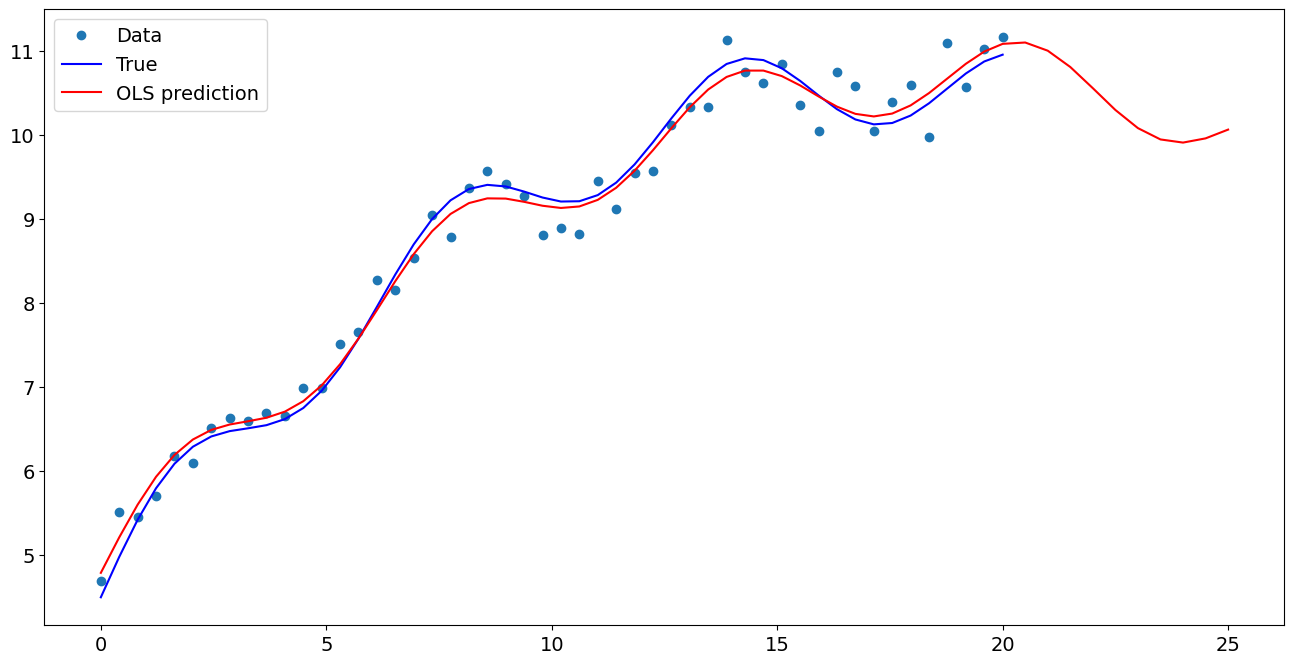

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.199576
x1                  0.458545
np.sin(x1)          0.431611
I((x1 - 5) ** 2)   -0.016353
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.101152
1    11.003730
2    10.809720
3    10.557693
4    10.298425
5    10.082462
6     9.947746
7     9.910323
8     9.960419
9    10.064830
dtype: float64